## Model Training to test [Linear Regression]
---

In [39]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for 

#Decision Tree Classifier Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [40]:
clean_cc_data = pd.read_excel('check.xlsx')
clean_cc_data.head()

,Country code,Country name,Year,Access to improved sanitation (% of total pop.),Access to improved water source (% of total pop.),CO2 emissions per capita (metric tons),"CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)","CO2 emissions, total (KtCO2)",Cereal yield (kg per hectare),"Child malnutrition, underweight (% of under age 5)",Energy use per capita (kilograms of oil equivalent),"Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)","Foreign direct investment, net inflows (% of GDP)",GDP ($),GHG net emissions/removals by LUCF (MtCO2e),GNI per capita (Atlas $),Invest. in energy w/ private participation ($),Invest. in telecoms w/ private participation ($),Invest. in transport w/ private participation ($),Invest. in water/sanit. w/ private participation ($),Nationally terrestrial protected areas (% of total land area),Paved roads (% of total roads),"Physicians (per 1,000 people)",Population,Population growth (annual %),Population in urban agglomerations >1million (%),Population living below $1.25 a day (% of total),"Primary completion rate, total (% of relevant age group)",Ratio of girls to boys in primary & secondary school (%),"Under-five mortality rate (per 1,000)",Urban population,Urban population growth (annual %)
0,ARG,Argentina,1990,90.0,94.0,3.449913,462.560560,112613.570,2232.2,1.7,1411.466520,189.247912,1.298882,1.413524e+11,-43.2979,3180,5.023150e+09,1254700000,2.088000e+09,7.500000e+07,4.587644,28.500000,2.680000,32642442.0,1.404532,39.204392,0.13,100.0,100.0,26.9,2.839892e+07,1.865363
1,ARG,Argentina,1991,90.2,94.2,3.536073,426.614517,117021.304,2666.1,1.7,1434.960601,173.122857,1.285579,1.897200e+11,-43.2979,3960,5.023150e+09,2648000000,2.140000e+08,7.500000e+07,4.772468,28.500000,2.682000,33093579.0,1.372593,39.119646,0.13,100.0,100.0,25.8,2.890393e+07,1.762636
2,ARG,Argentina,1992,90.4,94.4,3.620969,395.521880,121447.373,3057.3,1.7,1489.450708,162.694128,1.936791,2.287794e+11,-43.2979,6300,5.023150e+09,1111000000,8.147000e+08,0.000000e+00,5.060855,28.500000,2.684000,33540023.0,1.340017,39.042135,0.13,100.0,100.0,24.9,2.940789e+07,1.728544
3,ARG,Argentina,1993,90.6,94.6,3.490348,364.733889,118609.115,2846.5,1.7,1469.434276,153.552751,1.179744,2.367536e+11,-43.2979,7100,2.494840e+09,2095000000,1.439600e+09,4.000000e+09,5.156290,28.600000,2.682667,33982035.0,1.309256,38.975668,0.49,100.0,100.0,24.2,2.991099e+07,1.696280
4,ARG,Argentina,1994,90.8,94.8,3.583651,358.397431,123350.546,2815.9,1.7,1552.459429,155.259927,1.411953,2.574400e+11,-43.2979,7570,2.075680e+09,2170000000,9.405000e+08,1.900000e+06,5.235386,28.700001,2.681333,34420352.0,1.281601,38.920819,0.85,100.0,100.0,23.4,3.041382e+07,1.667133


In [41]:
pd.set_option('display.max_columns', None)

clean_cc_data.info(32)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 32 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Country code                                                   210 non-null    object 
 1   Country name                                                   210 non-null    object 
 2   Year                                                           210 non-null    int64  
 3   Access to improved sanitation (% of total pop.)                210 non-null    float64
 4   Access to improved water source (% of total pop.)              189 non-null    float64
 5   CO2 emissions per capita (metric tons)                         210 non-null    float64
 6   CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)       210 non-null    float64
 7   CO2 emissions, total (KtCO2)                                  

Creating a Standard of Living Index
with these variables

| Education | Health | Income |
|---|---|---|
| Primary completion rate 0.15 | Under-five mortality 0.15 | GNI per capita 0.15 |
|                              | Physicians per 1,000 0.10 | Poverty rate 0.10 |

<br/>

| Infrastructure | Urbanization | Basic Services |
|---|---|---|
| Paved roads 0.10 | Urban population 0.05 | Improved water 0.10     |
|                  |                       | Improved sanitation 0.10 |




Example of weighting which is more important then the formula can be (data x weight) then add up all to standard of living/1

In [ ]:
#Creating DataFrames for all the variables to create the Standard of Living Index

s1 = pd.DataFrame(clean_cc_data['Primary completion rate, total (% of relevant age group)'])
s2 = pd.DataFrame(clean_cc_data['Under-five mortality rate (per 1,000)'])
s3 = pd.DataFrame(clean_cc_data['Physicians (per 1,000 people)'])
s4 = pd.DataFrame(clean_cc_data['GNI per capita (Atlas $)'])
s5 = pd.DataFrame(clean_cc_data['Population living below $1.25 a day (% of total)'])
s6 = pd.DataFrame(clean_cc_data['Paved roads (% of total roads)'])
s7 = pd.DataFrame(clean_cc_data['Urban population'])
s8 = pd.DataFrame(clean_cc_data['Access to improved sanitation (% of total pop.)'])
s9 = pd.DataFrame(clean_cc_data['Access to improved water source (% of total pop.)'])

These are the formulas used to calculate our standard of living

| Primary completion rate (%) | Under-five mortality rate (/1000) | Physicians per 1,000 | GNI per capita |
|---|---|---|---|
| $E = e/100$ | $H = 1 - M/Mmax$ | $P = p/Max p$ | $I = i/100$ |

<br/>

| Population below $1.25/day (%) | Paved roads (%) | Urban population (%) | Improved water(%) | 
|---|---|---|---|
| $Pov = 1 - pov/$ | $R = r/100$ | $U = u/100$ | $W = w/100$ | 

<br/>
Improved sanitation (%)<br/>
$S = s/100$

Partition the dataset given randomly into Train and Test datasets – 70% for Train and 30% for Test. 

On the Train set, fit three uni-variate Decision Tree models for Alcohol against each of the three numeric variables, with max_depth = 2. 

For each such tree model, print the classification accuracy of the model you fit. 

Also compute the Precision and Recall scores for both train and test datasets.

In [43]:
X1 = pd.DataFrame(clean_cc_data['CO2 emissions per capita (metric tons)'])
X2 = pd.DataFrame(clean_cc_data['CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)'])
X3 = pd.DataFrame(clean_cc_data['GHG net emissions/removals by LUCF (MtCO2e)'])
y = pd.DataFrame(clean_cc_data['Cereal yield (kg per hectare)'])
y=y.astype('str')
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3)
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size = 0.3)

print('X1 Train Data: ', X1_train.shape, y_train.shape)
print('X1 Test Data: ', X1_test.shape, y_test.shape)
print('X2 Train Data: ', X2_train.shape, y_train.shape)
print('X2 Test Data: ', X2_test.shape, y_test.shape)
print('X3 Train Data: ', X3_train.shape, y_train.shape)
print('X3 Test Data: ', X3_test.shape, y_test.shape)

X1 Train Data:  (147, 1) (147, 1)
X1 Test Data:  (63, 1) (63, 1)
X2 Train Data:  (147, 1) (147, 1)
X2 Test Data:  (63, 1) (63, 1)
X3 Train Data:  (147, 1) (147, 1)
X3 Test Data:  (63, 1) (63, 1)


In [44]:
DT1 = DecisionTreeClassifier(max_depth = 2)
DT2 = DecisionTreeClassifier(max_depth = 2)
DT3 = DecisionTreeClassifier(max_depth = 2)
DT1.fit(X = X1_train, y = y_train)
DT2.fit(X = X2_train, y = y_train)
DT3.fit(X = X3_train, y = y_train)

DecisionTreeClassifier(max_depth=2)

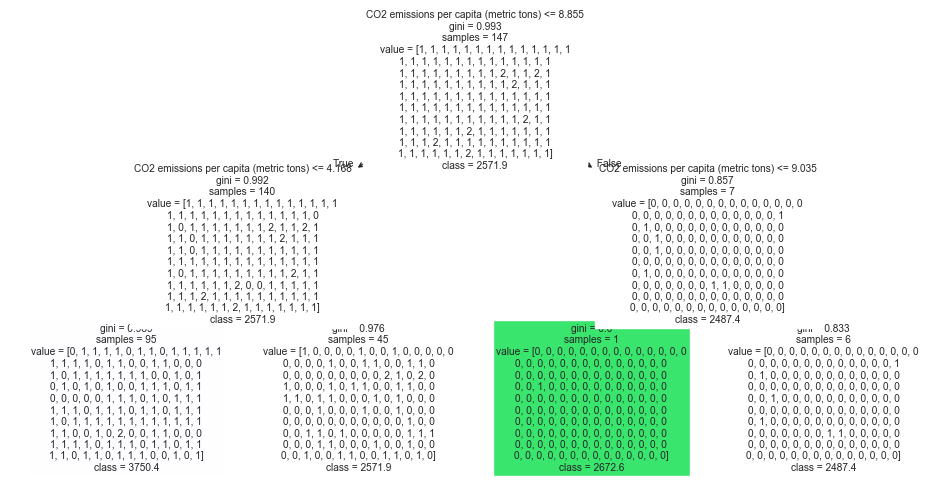

In [45]:
plt.figure(figsize=(12,6))
plot_tree(DT1, filled = True, feature_names = DT1.feature_names_in_, class_names = DT1.classes_);

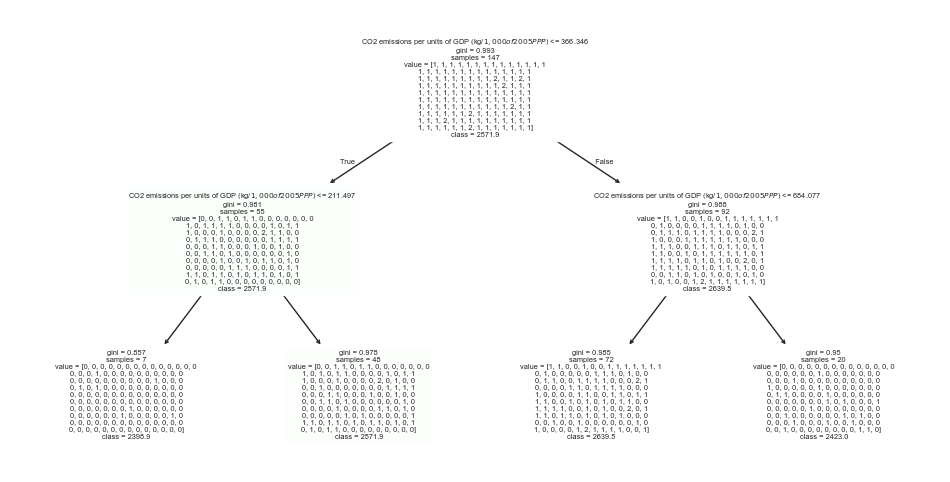

In [46]:
plt.figure(figsize=(12,6))
plot_tree(DT2, filled = True, feature_names = DT2.feature_names_in_, class_names = DT2.classes_);

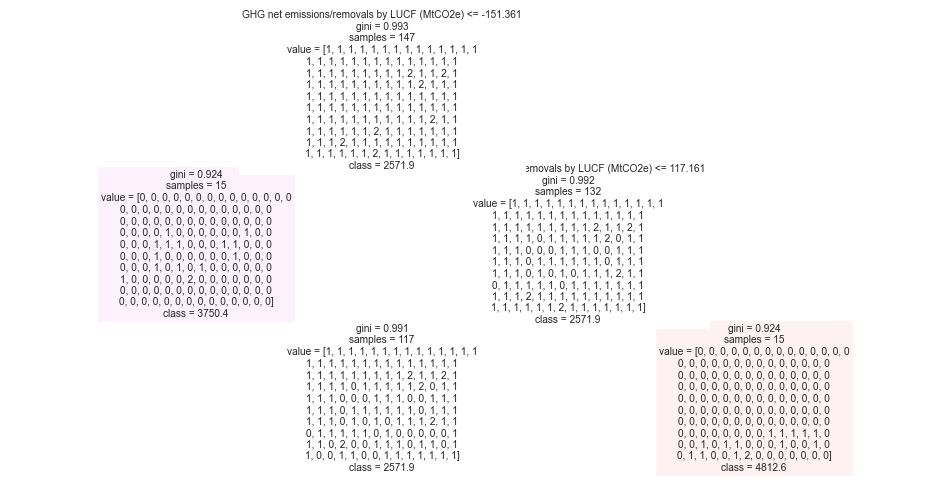

In [47]:
plt.figure(figsize=(12,6))
plot_tree(DT3, filled = True, feature_names = DT3.feature_names_in_, class_names = DT3.classes_);

<Axes: >

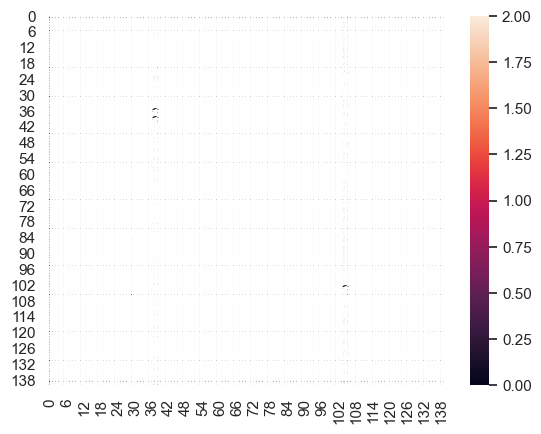

In [48]:
y1_train_pred = DT1.predict(X1_train)
sb.heatmap(confusion_matrix(y_train, y1_train_pred), annot = True)

<Axes: >

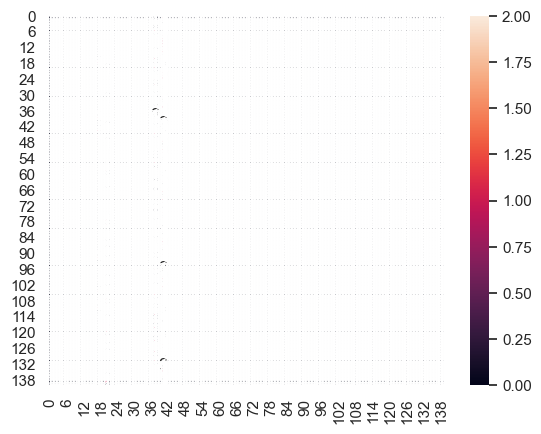

In [49]:
y2_train_pred = DT2.predict(X2_train)
sb.heatmap(confusion_matrix(y_train, y2_train_pred), annot = True)

<Axes: >

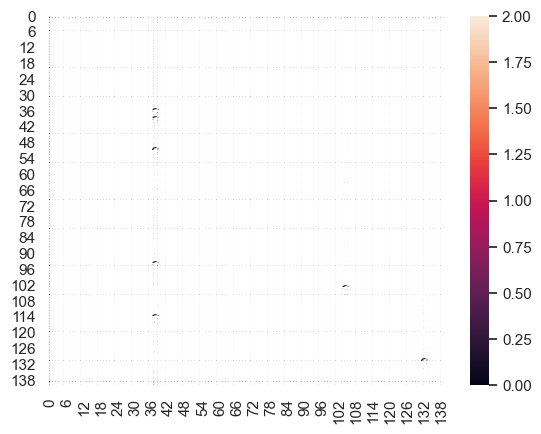

In [50]:
y3_train_pred = DT3.predict(X3_train)
sb.heatmap(confusion_matrix(y_train, y3_train_pred), annot = True)

In [51]:
CM1 = confusion_matrix(y_train, y1_train_pred)

TP = CM1[1][1]
TN = CM1[0][0]
FP = CM1[0][1]
FN = CM1[1][0]

P = TP / (TP + FP)
R = TP / (TP + FN)

print("Train Classification Accuracy \t:", DT1.score(X1_train, y_train))
print("Precision:", P)
print("Recall:", R)

Train Classification Accuracy 	: 0.04081632653061224
Precision: nan
Recall: nan


C:\Users\Winston James\AppData\Local\Temp\ipykernel_21588\2336841906.py:8: RuntimeWarning: invalid value encountered in scalar divide
  P = TP / (TP + FP)
C:\Users\Winston James\AppData\Local\Temp\ipykernel_21588\2336841906.py:9: RuntimeWarning: invalid value encountered in scalar divide
  R = TP / (TP + FN)


In [52]:
CM2 = confusion_matrix(y_train, y2_train_pred)

TP = CM2[1][1]
TN = CM2[0][0]
FP = CM2[0][1]
FN = CM2[1][0]

P = TP / (TP + FP)
R = TP / (TP + FN)

print("Train Classification Accuracy \t:", DT2.score(X2_train, y_train))
print("Precision:", P)
print("Recall:", R)

Train Classification Accuracy 	: 0.04081632653061224
Precision: nan
Recall: nan


C:\Users\Winston James\AppData\Local\Temp\ipykernel_21588\1836458270.py:8: RuntimeWarning: invalid value encountered in scalar divide
  P = TP / (TP + FP)
C:\Users\Winston James\AppData\Local\Temp\ipykernel_21588\1836458270.py:9: RuntimeWarning: invalid value encountered in scalar divide
  R = TP / (TP + FN)


In [53]:
CM3 = confusion_matrix(y_train, y3_train_pred)

TP = CM3[1][1]
TN = CM3[0][0]
FP = CM3[0][1]
FN = CM3[1][0]

P = TP / (TP + FP)
R = TP / (TP + FN)

print("Train Classification Accuracy \t:", DT3.score(X3_train, y_train))
print("Precision:", P)
print("Recall:", R)

Train Classification Accuracy 	: 0.04081632653061224
Precision: nan
Recall: nan


C:\Users\Winston James\AppData\Local\Temp\ipykernel_21588\2633334761.py:8: RuntimeWarning: invalid value encountered in scalar divide
  P = TP / (TP + FP)
C:\Users\Winston James\AppData\Local\Temp\ipykernel_21588\2633334761.py:9: RuntimeWarning: invalid value encountered in scalar divide
  R = TP / (TP + FN)
